In [278]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as ply
import warnings
warnings.filterwarnings('ignore')

In [279]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [280]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [281]:
df.drop(index=[122,123],inplace=True)

In [282]:
df.reset_index(inplace=True)

In [283]:
df['region']=0
for i in range(len(df)):
    if i<123:
        df['region'][i]=1
    else:
        df['region'][i]=0

In [284]:
df.columns=[i.strip() for i in df.columns]

In [285]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [286]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [287]:
df['Classes']=df.Classes.str.strip()

In [288]:
df['Classes'].unique()

array(['not fire', 'fire', 'Classes'], dtype=object)

In [289]:
df.replace('14.6 9','14.69',inplace=True)

In [290]:
df.iloc[122]

index                  124
day                    day
month                month
year                  year
Temperature    Temperature
RH                      RH
Ws                      Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes            Classes
region                   1
Name: 122, dtype: object

In [291]:
df=df.drop([122])

In [292]:
df

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0
241,243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0
242,244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
243,245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [293]:
df.drop('index',inplace=True,axis=1)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [295]:
##changing the data types
convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64','Ws':'int64','Rain':'float64','FFMC':'float64','DMC':'float64','DC':'float64','ISI':'float64','BUI':'float64','FWI':'float64','region':'int64'}
df=df.astype(convert)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.5+ KB


In [296]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,0
241,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
242,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
243,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [297]:
df.shape

(244, 15)

In [298]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [299]:
#to check the number of days fire happened in a month
df[df['Classes'] == 'fire'].groupby(['region', 'month'])[['day']].count()

day
region month     
0      6       12
       7       24
       8       27
       9       16
1      6       13
       7       15
       8       24
       9        7

In [300]:
#highest rainfall
highest_rain = df.sort_values(by='Rain',ascending=False)[['Rain','day','month','year']].head(1)
highest_rain

,Rain,day,month,year
91,16.8,31,8,2012


In [301]:
#lowest rainfall
lowest_rain = df.sort_values(by='Rain',ascending=True)[['Rain','day','month']].head(1)
lowest_rain

,Rain,day,month
0,0.0,1,6


In [302]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,0
241,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
242,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
243,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [303]:
df.drop(['Classes','year','day','month'],axis=1,inplace=True)

In [304]:
numerical_feature=[i for i in df.columns if df[i].dtypes!='O']
numerical_feature

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region']

In [305]:
categorical_feature=[i for i in df.columns if df[i].dtypes=='O']
categorical_feature

[]

# univariate analysis

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>,
        <AxesSubplot:title={'center':'region'}>, <AxesSubplot:>]],
      dtype=object)

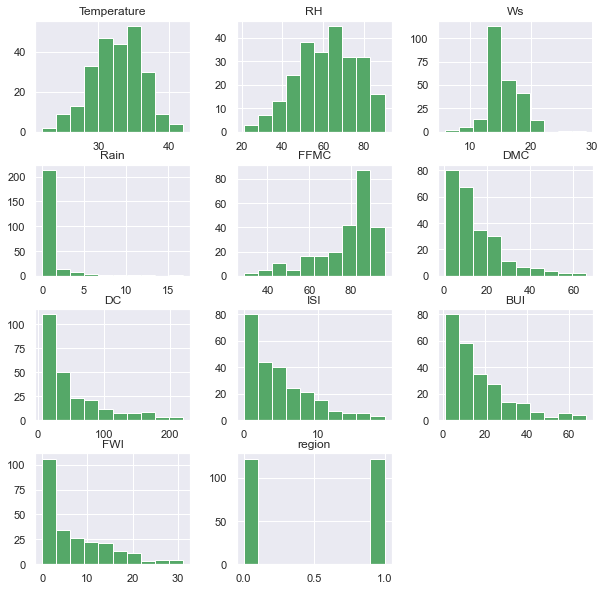

In [175]:
df.hist(figsize=(10,10),color='g')

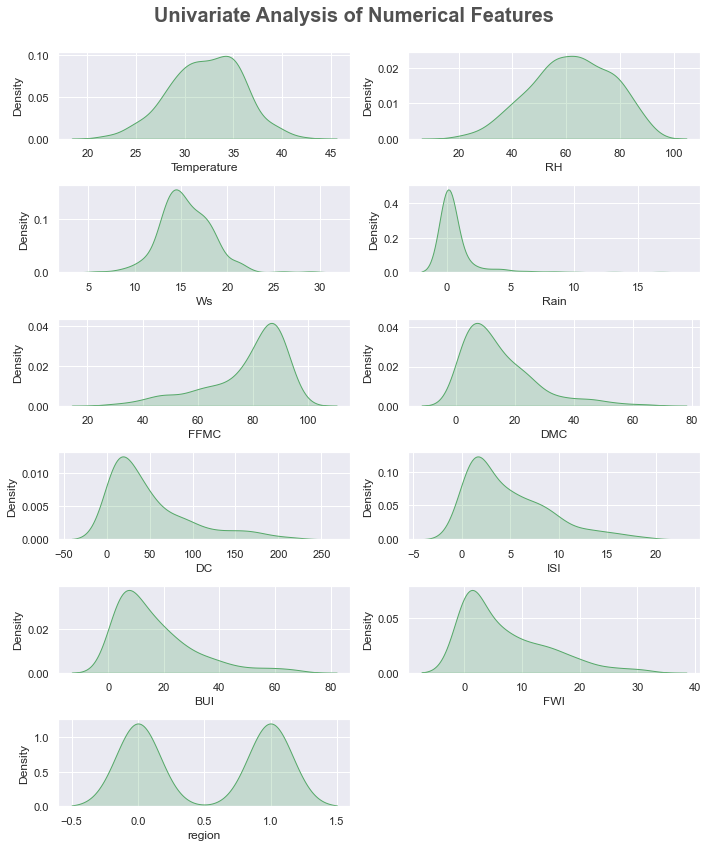

In [176]:
plt.figure(figsize=(10,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(8,2,i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True, color='g')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

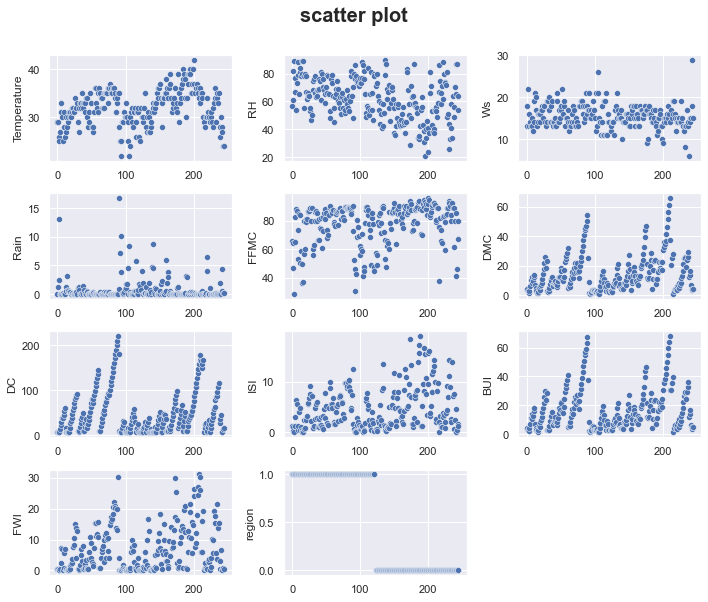

In [178]:
plt.figure(figsize=(10, 10))
plt.suptitle('scatter plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_feature)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_feature[i], x=df.index, data=df)
    plt.tight_layout()

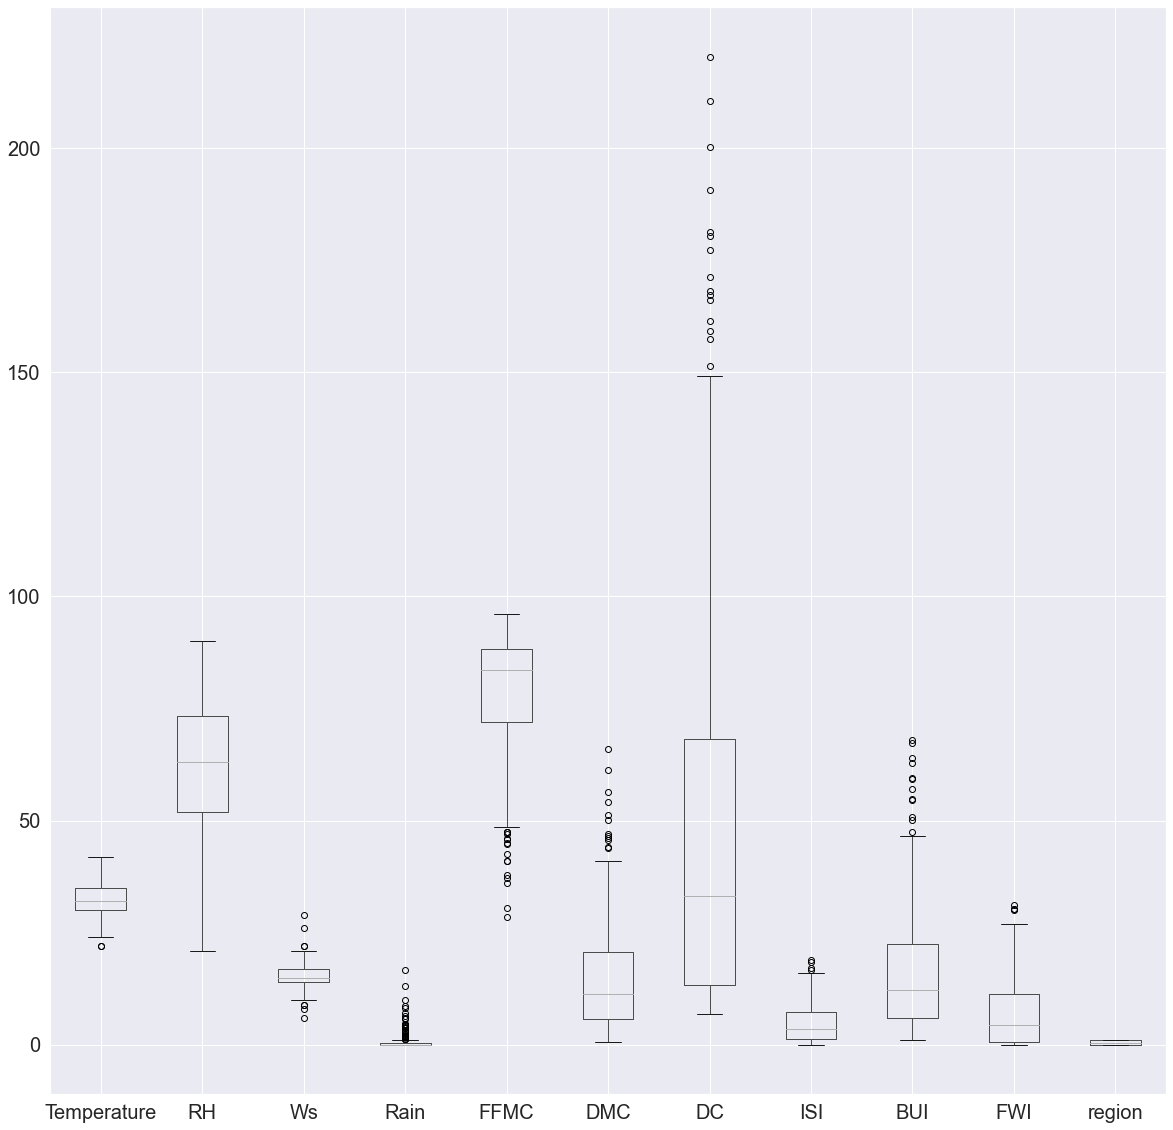

In [380]:
#box plot to check for outliers
boxplot = df.boxplot(fontsize=20,figsize=(20,20))

# Bivariate analysis

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

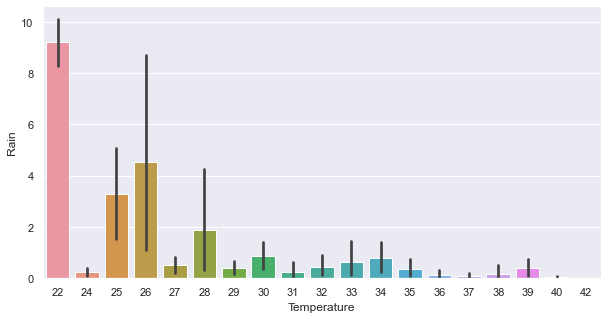

In [179]:
plt.figure(figsize=(10,5))
sns.barplot(x='Temperature', y='Rain', data= df)

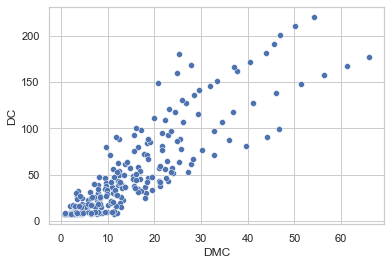

In [181]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['DMC'],y=df['DC'],data=df)
df['DMC'].corr(df['DC'])
plt.show()


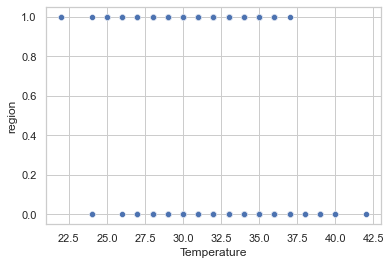

In [182]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Temperature'],y=df['region'],data=df)
df['Temperature'].corr(df['region'])
plt.show()

# Multi-Variate analysis

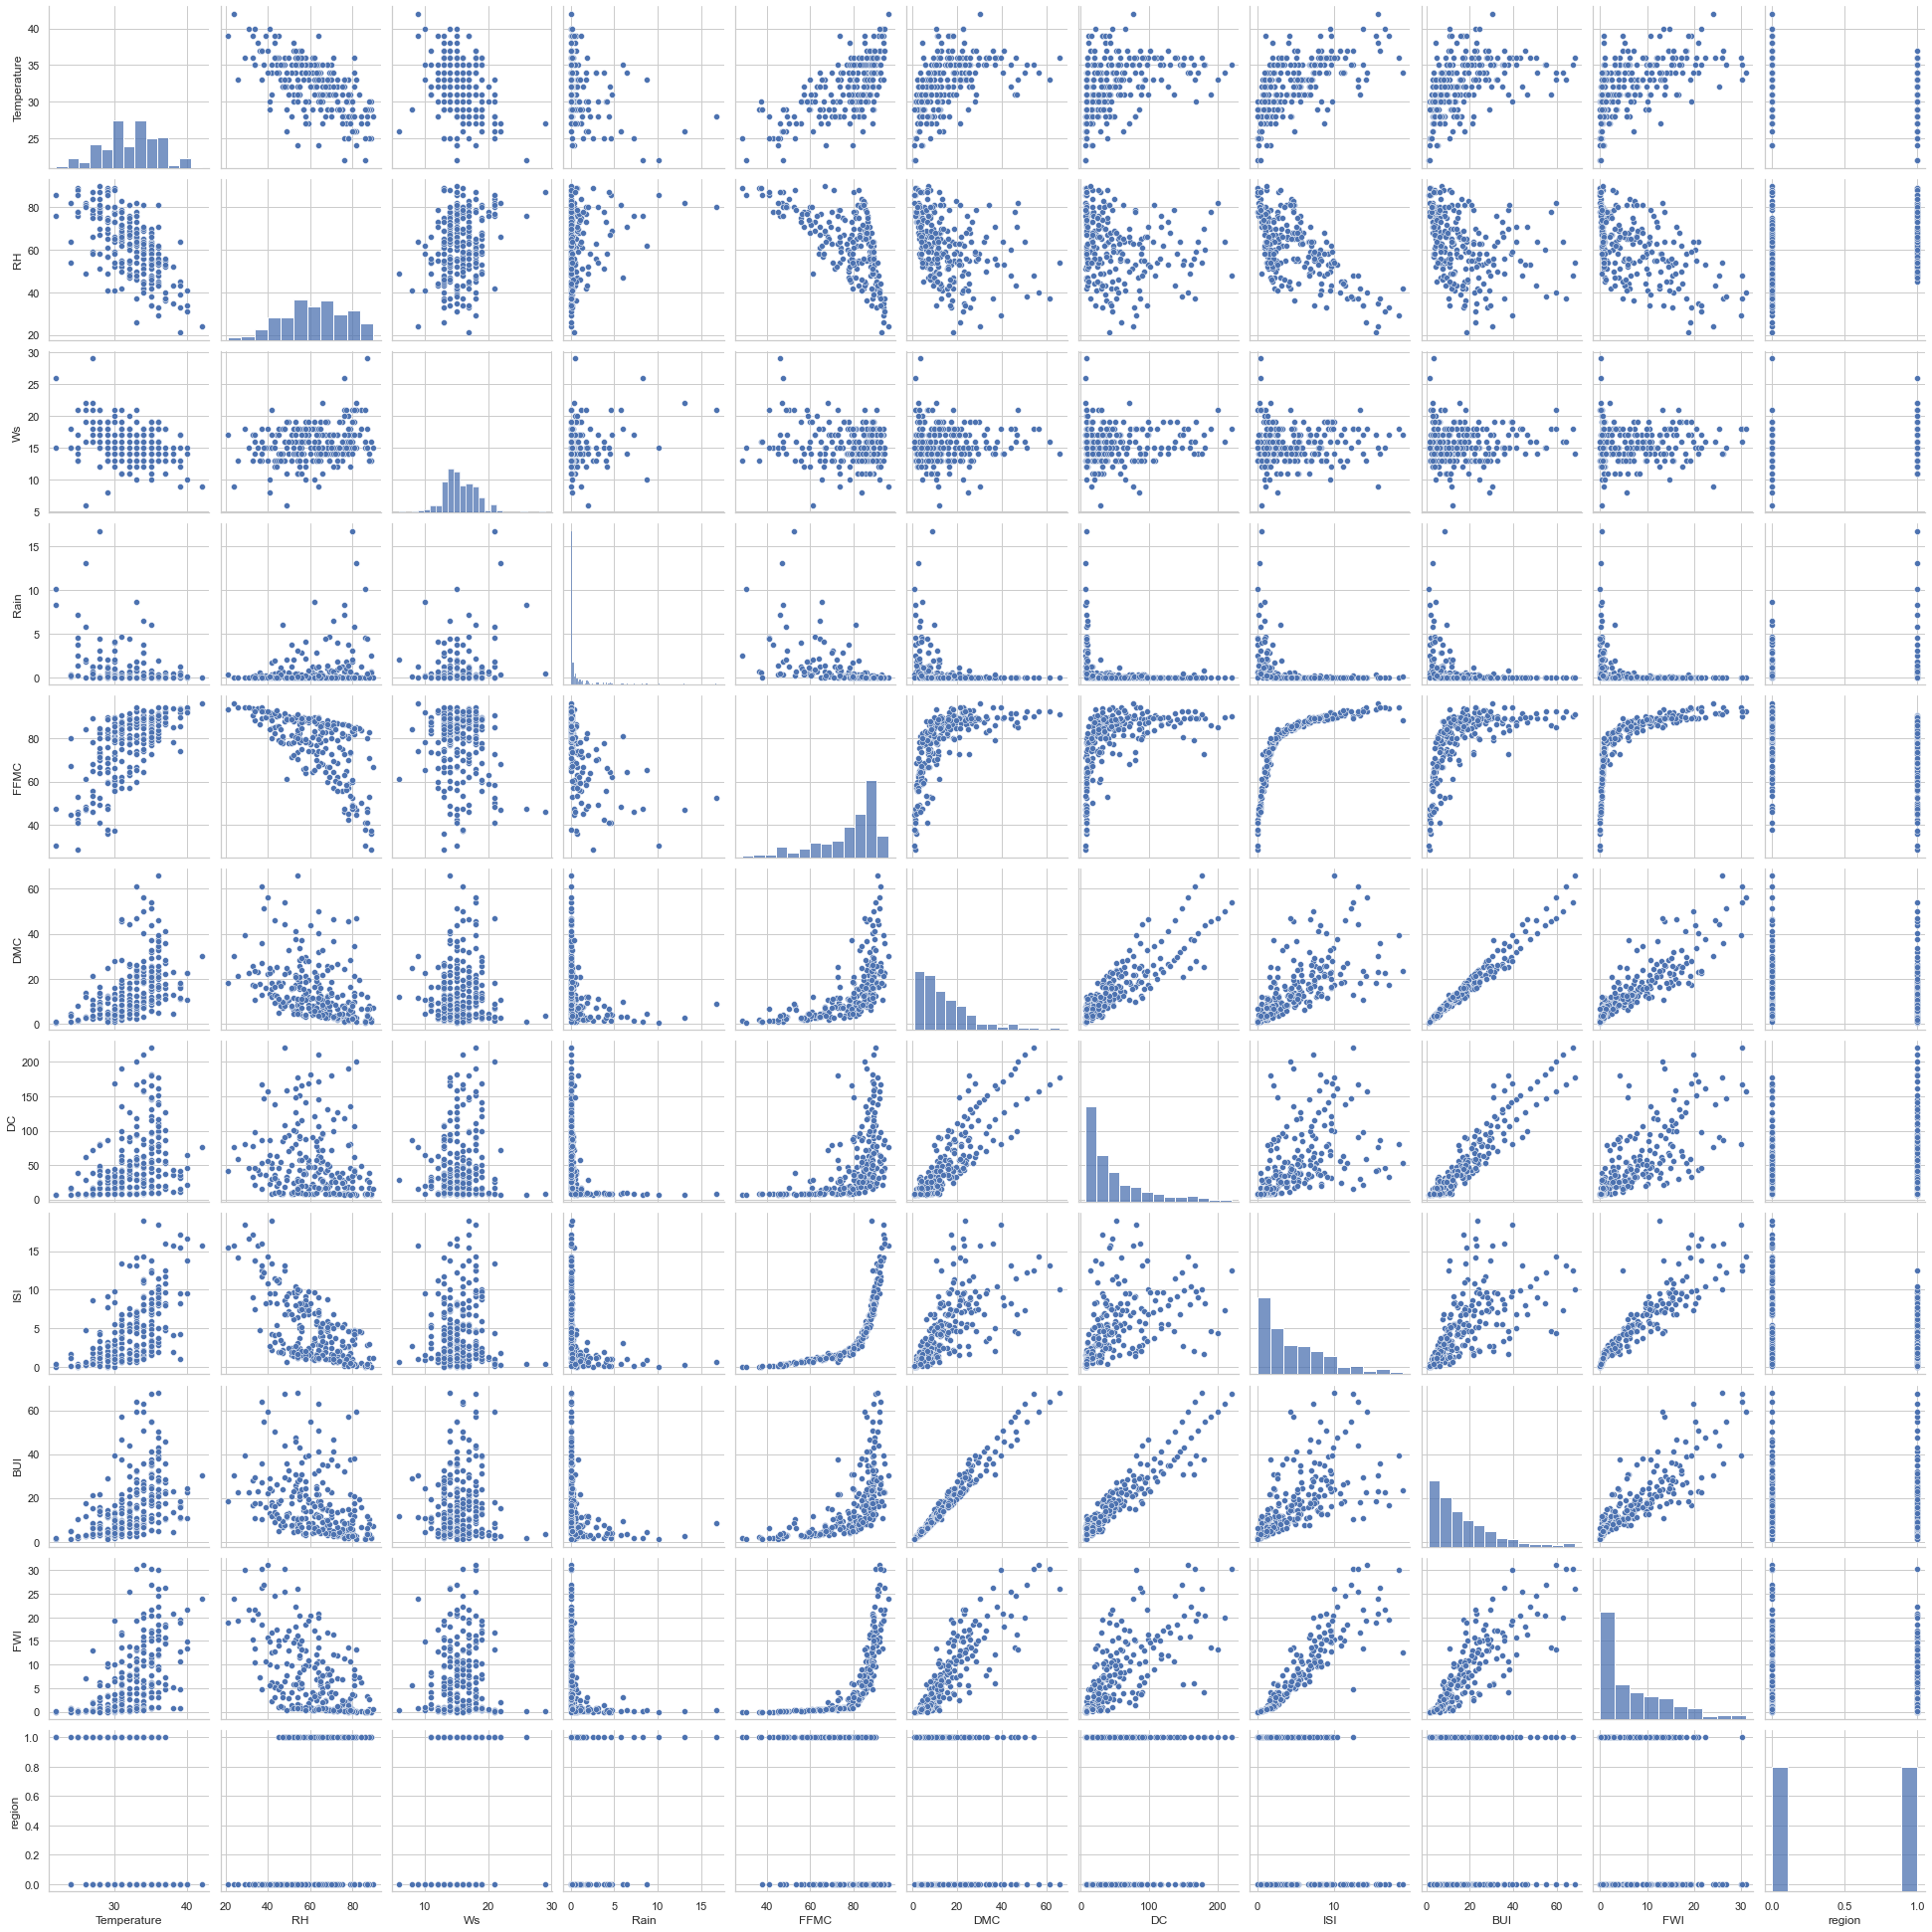

In [183]:
sns.pairplot(df)

<AxesSubplot:>

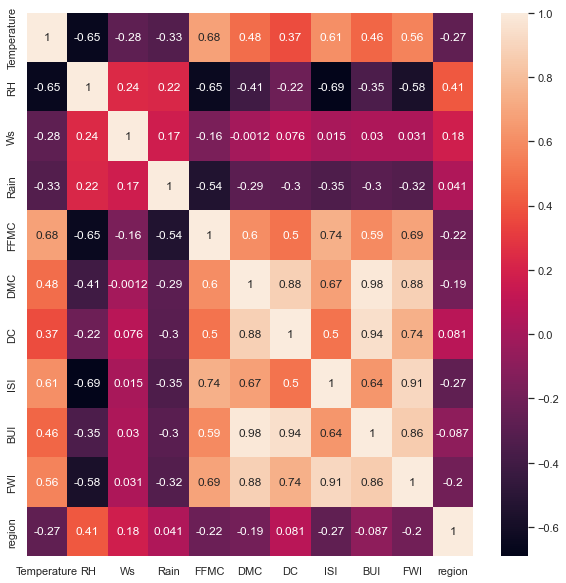

In [184]:
sns.set(rc = {'figure.figsize' : (10,10)})
sns.heatmap(df.corr(), annot = True)

Text(0, 0.5, 'Temperature')

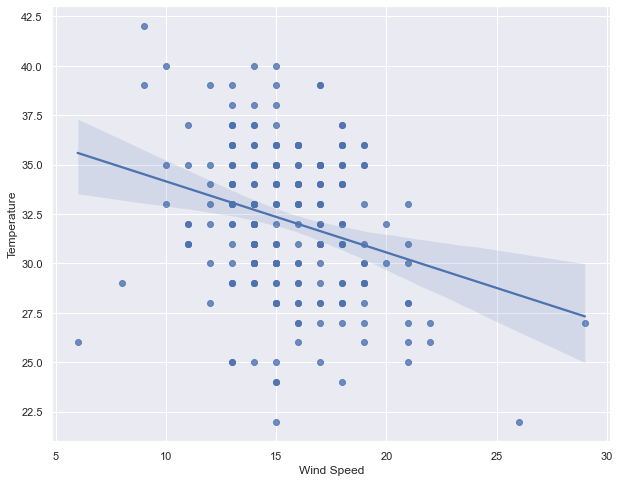

In [376]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='Ws', y='Temperature', data=df)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')

In [377]:
#negative correlation between wind speed and temperature

Text(0, 0.5, 'Temperature')

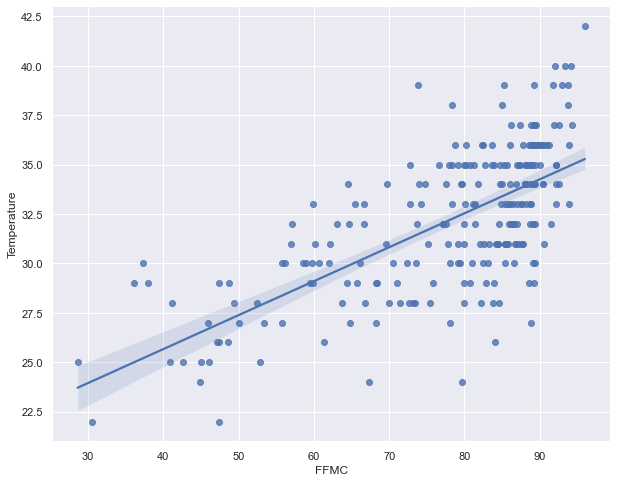

In [378]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='FFMC', y='Temperature', data=df)
plt.xlabel('FFMC')
plt.ylabel('Temperature')

In [379]:
#positive correlation between FFMC ans Temperature

# Splitting Train and Test data

In [306]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
240,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
241,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
242,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
243,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [307]:
##x- Independent And y-Dependent Features
x=df.loc[: , df.columns != 'Temperature']
y=df.iloc[:,0]

In [308]:
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...
240,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
241,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
242,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
243,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [309]:
y

0      29
1      29
2      26
3      25
4      27
       ..
240    30
241    28
242    27
243    24
244    24
Name: Temperature, Length: 244, dtype: int64

In [310]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [313]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((163, 10), (163,), (81, 10), (81,))

In [314]:
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
238,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0
78,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1
25,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1
125,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
177,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0
...,...,...,...,...,...,...,...,...,...,...
64,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1
15,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,1
229,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,0
126,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0


In [315]:
y_train

238    26
78     36
25     31
125    29
177    39
       ..
64     34
15     29
229    32
126    30
9      28
Name: Temperature, Length: 163, dtype: int64

In [316]:
x_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
163,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0
60,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,1
61,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,1
63,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,1
69,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,1
...,...,...,...,...,...,...,...,...,...,...
170,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,0
233,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,0
145,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0
209,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,0


In [317]:
y_test

163    34
60     35
61     36
63     35
69     35
       ..
170    33
233    29
145    33
209    33
105    22
Name: Temperature, Length: 81, dtype: int64

# standardization or feature scaling

In [318]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [319]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.32535487,
        -0.86178057, -0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  0.76565444,
         1.2187691 ,  1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.35302912,
         0.48991412,  1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.08727045,
         0.38389885, -0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.76595478,
        -0.78226912, -0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.27639932,
        -0.79552103,  1.01857744]])

In [320]:
# to avoid data leakage we use transform not fit_transform
x_test=scaler.transform(x_test)
x_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21344278e-01,
        -7.33442383e-01, -6.82030988e-01, -8.08772934e-01,
        -9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03375301e+00,
         4.94418103e-01,  1.72378441e+00,  1.16576147e+00,
         1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06670504e-01,
        -6.38991577e-01, -8.28897625e-01, -7.95521025e-01,
         1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10863011e-01,
        -7.09829682e-01, -7.72948430e-01, -8.08772934e-01,
         1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74376141e-01,
         5.18030804e-01,  9.42640966e-02,  3.97150762e-01,
         1.

# Model training

# Linear regression

In [321]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [322]:
#Number of features seen during fit.
print(regression.n_features_in_)

10


In [323]:
# Comparing the scores
print(regression.score(x_train, y_train))
print(regression.score(x_test, y_test))

0.5759379493436252
0.531863336809028


In [324]:
## print the coefficients
print(regression.coef_)

[-1.17144224 -0.53695742 -0.24190872  0.99196732 -0.13927804  0.84724017
  0.36984902 -0.2467169  -0.1676641  -0.27345045]


In [325]:
## print the intercept
print(regression.intercept_)

32.17791411042945


In [326]:
## Prediction for the test data
reg_pred=regression.predict(x_test)
reg_pred

array([31.83539567, 33.25609417, 33.18180004, 31.53627983, 32.81233657,
       34.73701421, 33.76983788, 34.33143165, 31.82039705, 32.79733302,
       33.72900916, 27.64145602, 35.33469776, 29.63825222, 31.86665005,
       32.10052202, 34.14573355, 27.99015495, 36.13851147, 34.28075279,
       32.59216976, 34.58714525, 33.48044582, 32.97385075, 36.03948604,
       29.17694344, 32.32724482, 32.72173508, 27.53350326, 32.2194553 ,
       25.92508674, 27.30426478, 33.75659623, 32.06458848, 32.81648847,
       30.95867441, 28.94736875, 32.71802584, 27.66563389, 35.3145401 ,
       32.69069938, 34.06045231, 34.02070085, 31.55099927, 36.4850689 ,
       33.88232315, 24.37330925, 35.06614803, 33.86357531, 29.60609136,
       31.0930247 , 32.29699943, 35.65848234, 31.95483783, 30.21399114,
       30.23409171, 32.81046375, 36.04500413, 31.44370785, 33.72188677,
       32.23021369, 32.71992182, 30.84980686, 24.36764207, 31.4720019 ,
       36.34574896, 29.90954896, 30.00047132, 34.94993648, 33.67

# Assumptions of Linear Regression

Text(0, 0.5, 'Test predicted data')

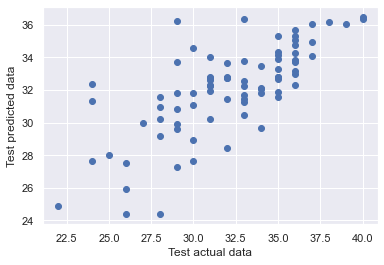

In [327]:
#Assumptions
plt.scatter(y_test,reg_pred)
plt.xlabel('Test actual data')
plt.ylabel('Test predicted data')

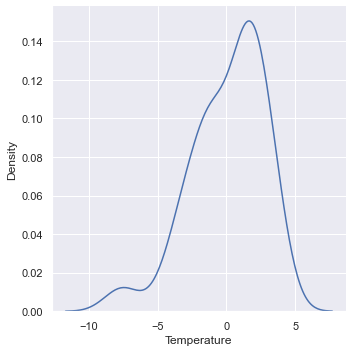

In [328]:
#residuals
residuals=y_test-reg_pred
sns.displot(residuals,kind='kde')

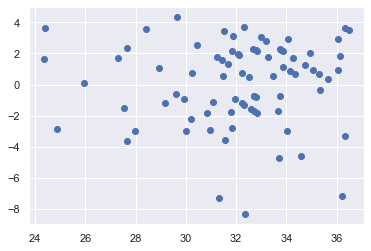

In [329]:
##Check for Homoscedasticity
plt.scatter(reg_pred,residuals)

In [330]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.079345137704901
2.1785298603308805
2.6607038801236227


In [331]:
##R square 
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.531863336809028


In [332]:
## Adjusted R square

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4649866706388892

# Ridge regression

In [333]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
ridge_pred

array([31.83113676, 33.25638643, 33.176485  , 31.54357704, 32.81054391,
       34.74110977, 33.73875574, 34.24894507, 31.82250067, 32.79503132,
       33.73386723, 27.65462214, 35.31835525, 29.6230972 , 31.86138424,
       32.10672719, 34.12911367, 28.01354264, 36.14465202, 34.30789784,
       32.58765071, 34.53153532, 33.48327585, 32.97969318, 36.02374486,
       29.19218145, 32.27915544, 32.72926248, 27.55668993, 32.21652938,
       25.93883901, 27.32223664, 33.74851037, 32.05934115, 32.81078098,
       30.94597382, 28.94806235, 32.7041433 , 27.68879874, 35.29509805,
       32.68046837, 34.07180512, 34.02862897, 31.53375313, 36.47301836,
       33.882384  , 24.37834936, 35.06512853, 33.87470142, 29.61261993,
       31.09042866, 32.29903279, 35.68001141, 31.95193897, 30.22597464,
       30.22011989, 32.82463965, 36.06472095, 31.44709488, 33.70310596,
       32.22098853, 32.71553475, 30.85766957, 24.36462347, 31.47160375,
       36.31358033, 29.91809467, 29.97990478, 34.96760753, 33.65

In [334]:
#Number of features seen during fit.
print(ridge.n_features_in_)

10


In [335]:
# Comparing the scores
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.575889269290496
0.5321639189313512


In [336]:
#coefficients
ridge.coef_

array([-1.16532169, -0.53568971, -0.24590129,  0.98440777, -0.19763916,
        0.75815656,  0.3512678 , -0.10742702, -0.14430173, -0.26809618])

In [337]:
#intecepts
ridge.intercept_

32.17791411042945

# Assumptions of Ridge regression

Text(0, 0.5, 'Predicted Data')

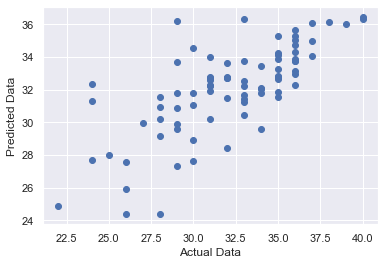

In [338]:
#Assumptions
plt.scatter(y_test,ridge_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

In [339]:
## Residual
ridge_residuals = y_test-ridge_pred
ridge_residuals

163    2.168863
60     1.743614
61     2.823515
63     3.456423
69     2.189456
         ...   
170    0.446142
233   -7.190393
145    1.308945
209   -3.357247
105   -2.890770
Name: Temperature, Length: 81, dtype: float64

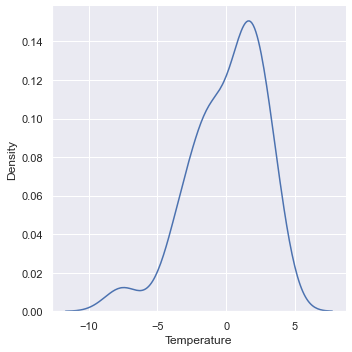

In [340]:
sns.displot(ridge_residuals,kind='kde')

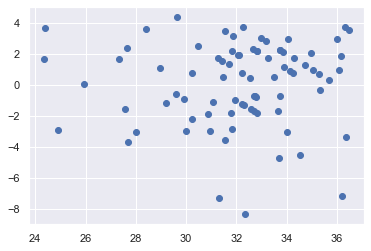

In [341]:
##Check for Homoscedasticity
## If it falls under Uniform distribution then the model is good
plt.scatter(ridge_pred,ridge_residuals)

In [342]:
## Performance Matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.074799617660295
2.1784697987832464
2.659849547936931


In [343]:
#R square
from sklearn.metrics import r2_score
r_score_ridge=r2_score(y_test,ridge_pred)
print(r_score_ridge)

0.5321639189313512


In [344]:
## Adjusted R square
1 - (1-r_score_ridge)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4653301930644014

In [345]:
#alphas along the path where models are computed.
print(ridge.alpha)

1.0


# Lasso Regression

In [346]:
## Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
#Lasso Prediction 
lasso_pred = lasso.predict(x_test)
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

In [347]:
#Number of features seen during fit.
print(lasso.n_features_in_)

10


In [348]:
# Comparing the scores
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.44230212250941503
0.39784019626969913


In [349]:
#coefficients
lasso.coef_

array([-0.71955751, -0.        , -0.        ,  0.89582004,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [350]:
#intecepts
lasso.intercept_

32.17791411042945

# Assumptions of Lasso regression

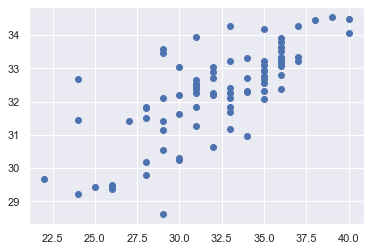

In [351]:
## Assumptions
plt.scatter(y_test,lasso_pred)

In [352]:
## Residual
lasso_residuals = y_test-lasso_pred
lasso_residuals

163    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
170    0.583574
233   -4.568827
145    0.882714
209   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

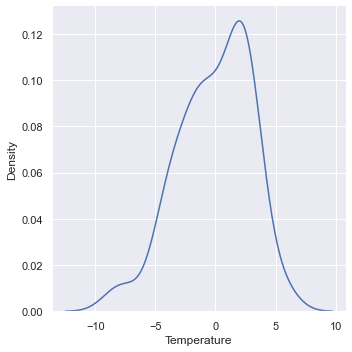

In [353]:
sns.displot(lasso_residuals,kind='kde')

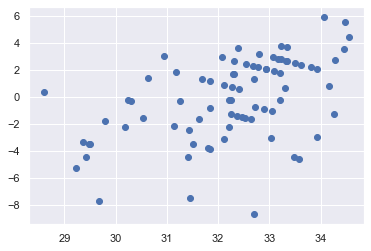

In [354]:
##Check for Homoscedasticity
## If it is a Uniform distribution,then the model is good
plt.scatter(lasso_pred,lasso_residuals)

In [355]:
## Performance Matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


In [356]:
#R2 score
from sklearn.metrics import r2_score
r_score_lasso=r2_score(y_test,lasso_pred)
print(r_score_lasso)

0.39784019626969913


In [357]:
## Adjusted R square
#display adjusted R-squared
1 - (1-r_score_lasso)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.31181736716537045

In [358]:
#dual gaps at the end of the optimization for each alpha.
print(lasso.dual_gap_)

1.598516294708005e-05


In [359]:
#alphas along the path where models are computed.
print(lasso.alpha)

1.0


# ElasticNet regression

In [360]:
# Elastic Net
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(x_train,y_train)
#ElasticNet Prediction 
elasticnet_pred = elasticnet.predict(x_test)
elasticnet_pred

array([31.92800409, 32.95992287, 32.6971948 , 31.76391343, 32.91195549,
       33.99250938, 33.50301968, 32.59282709, 31.92734565, 32.65608561,
       33.37006638, 29.89358216, 34.17890846, 30.67457303, 32.61533125,
       32.21230842, 32.78317503, 29.42895145, 35.16003261, 33.9239607 ,
       32.35218751, 33.40806386, 33.51538402, 32.8390492 , 35.17079709,
       30.02206104, 32.07126157, 32.54507313, 29.38310803, 32.02717965,
       29.15250594, 28.65054066, 33.20166063, 32.27263686, 32.63183803,
       31.32766072, 30.04373149, 32.2629332 , 29.20576589, 33.99254101,
       32.83053403, 33.54623282, 34.19787054, 31.53171076, 34.5296655 ,
       33.3796253 , 29.30846222, 33.92038427, 33.40262373, 30.35071765,
       31.39123938, 32.29409349, 34.69166135, 31.99152616, 31.35134225,
       30.91755219, 32.36760992, 34.84918885, 31.62567749, 33.43817168,
       32.06527056, 32.41109036, 31.23491898, 28.89146184, 31.89023255,
       34.85754749, 30.85444961, 31.00153258, 33.87009345, 32.87

In [361]:
#Number of features seen during fit.
print(elasticnet.n_features_in_)

10


In [362]:
# Comparing the scores
print(elasticnet.score(x_train, y_train))
print(elasticnet.score(x_test, y_test))

0.48006196815894986
0.45095995597885563


In [363]:
#coefficients
elasticnet.coef_

array([-0.68203697, -0.10840676, -0.01956053,  0.69968651,  0.07807734,
        0.        ,  0.24298961,  0.04491393,  0.14214743, -0.        ])

In [364]:
#intecepts
elasticnet.intercept_

32.17791411042945

# Assumptions of ElasticNet regression

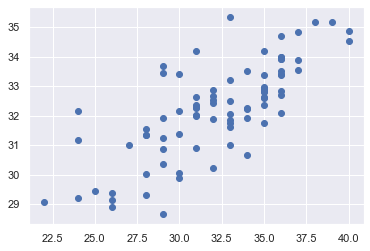

In [365]:
plt.scatter(y_test,elasticnet_pred)

In [366]:
## Residual
elasticnet_residuals = y_test-elasticnet_pred
elasticnet_residuals

163    2.071996
60     2.040077
61     3.302805
63     3.236087
69     2.088045
         ...   
170    0.514934
233   -4.687049
145    1.249260
209   -2.349818
105   -7.075187
Name: Temperature, Length: 81, dtype: float64

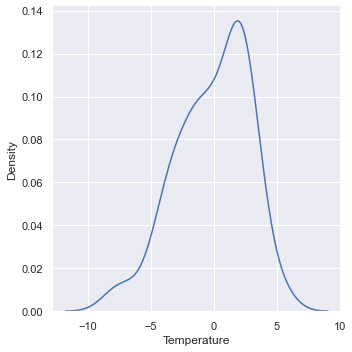

In [367]:
sns.displot(elasticnet_residuals,kind='kde')

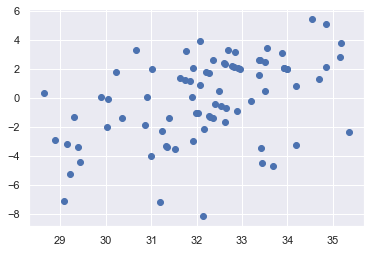

In [368]:
##Check for Homoscedasticity
## If it is Uniform distribution, model is good
plt.scatter(elasticnet_pred,elasticnet_residuals)

In [369]:
## Performance Matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elasticnet_pred))
print(mean_absolute_error(y_test,elasticnet_pred))
print(np.sqrt(mean_squared_error(y_test,elasticnet_pred)))

8.302797605195838
2.3897952125556903
2.8814575487408867


In [370]:
#R2 score
from sklearn.metrics import r2_score
r_score_elasticnet=r2_score(y_test,elasticnet_pred)
print(r_score_elasticnet)

0.45095995597885563


In [371]:
## Adjusted R square
1 - (1-r_score_elasticnet)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3725256639758351

In [372]:
#dual gaps at the end of the optimization for each alpha.
print(elasticnet.dual_gap_)

4.941106694396287e-05


In [373]:
#alphas along the path where models are computed.
print(elasticnet.alpha)

1.0


#                                              END